# Deep Learning with TensorFlow/Keras


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])

# Compile the model with a loss function and metrics
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# At this point, you might see the warning you mentioned
# WARNING:absl:Compiled the loaded model, but the compiled metrics have yet to be built.

# Train the model (metrics will be built here)
# Dummy data
import numpy as np
X = np.random.rand(100, 10)
y = np.random.rand(100)

model.fit(X, y, epochs=5)

# Evaluate the model (metrics will be used here)
model.evaluate(X, y)

2.17.0


C:\Users\areeb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - loss: 0.3362 - mae: 0.4804
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2139 - mae: 0.3711 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1578 - mae: 0.3317 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1214 - mae: 0.2979 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1097 - mae: 0.2932 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1152 - mae: 0.2993  


[0.12098509818315506, 0.30657240748405457]

## Load and Preprocess Data

In [2]:
# Create a dummy dataset
X, y = np.random.rand(1000, 20), np.random.randint(0, 2, 1000)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

## Build the Model

In [3]:
# Initialize the Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [ ]:
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##  Train the Model

In [5]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Output: Training history with loss and accuracy values for each epoch
history.history.keys()  # Show the keys in history to visualize training and validation performance

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4567 - loss: 0.7527 - val_accuracy: 0.4750 - val_loss: 0.6983
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5118 - loss: 0.6953 - val_accuracy: 0.4250 - val_loss: 0.7027
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5320 - loss: 0.6882 - val_accuracy: 0.4050 - val_loss: 0.7086
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5918 - loss: 0.6767 - val_accuracy: 0.4150 - val_loss: 0.7090
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5484 - loss: 0.6851 - val_accuracy: 0.4100 - val_loss: 0.7108
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5920 - loss: 0.6704 - val_accuracy: 0.4400 - val_loss: 0.7169
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5914 - loss: 0.6682 - val_accuracy: 0.4250 - val_loss: 0.7201
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5743 - loss: 0.6641 - val_accuracy: 0.4500 - val_lo

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Visualize Training History

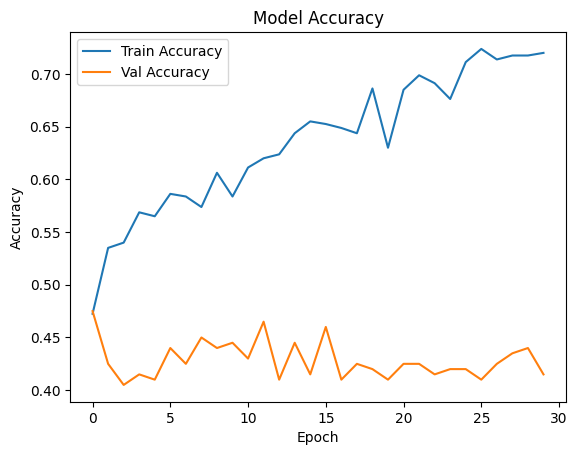

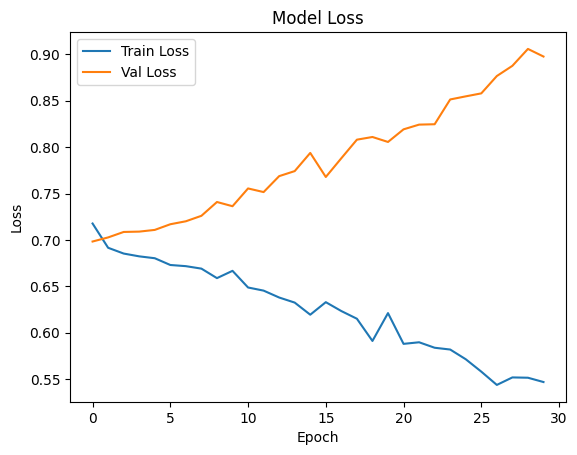

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

##  Evaluate the Model

In [7]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4258 - loss: 0.8640 
Test Loss: 0.8976, Test Accuracy: 0.4150


## Save the Model

In [4]:
# Save the trained model to a file
model.save('my_deep_learning_model.h5')

NameError: name 'model' is not defined

## Load the Model and Make Predictions

In [2]:
# Load the saved model
loaded_model = tf.keras.models.load_model('my_deep_learning_model.h5')

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

# Show the first 5 predictions
predictions[:5]


NameError: name 'tf' is not defined